# Reaction-diffusion
In this notebook, we generate the reaction-diffusion dataset and look at the POD of it.

## Imports

We start by importing the stuff we need for this notebook.

In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm import tqdm

from src.data.generate_datasets import generate_reaction_diffusion_dataset

## Settings
We input where to store the generated images and what parameters we'll be using.


In [5]:
storage_path = Path("../data/reaction_diffusion")
results_path = Path("../results/reaction_diffusion")

## Generate data
Use the parameters to generate the data.

In [6]:
dataset = generate_reaction_diffusion_dataset(base_storage_path=storage_path, return_database=True)


/Users/tjeerdjanheeringa/mambaforge/envs/sparse-manifold-learning-3.10/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/miniforge3/conda-bld/pytorch-recipe_1680607561775/work/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


## Detect transient behavior
The wavefront is not directly a spiral. This takes a while. Index 4000 is roughly when it ends.

In [7]:
u_max = []
v_max = []
u_min = []
v_min = []
for n, (u,v) in enumerate(dataset.data):
    u_max.append(torch.max(u))
    v_max.append(torch.max(v))
    u_min.append(torch.min(u))
    v_min.append(torch.min(v))


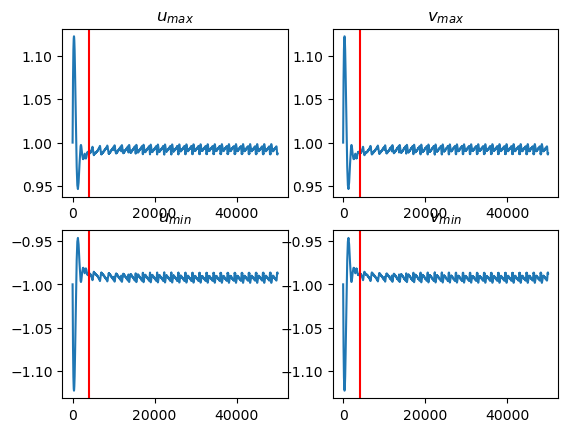

In [8]:
plt.figure()
vline = 4_000

plt.subplot(2,2,1)
plt.title(r"$u_{max}$")
plt.plot(u_max)
plt.axvline(vline, c="red")

plt.subplot(2,2,2)
plt.title(r"$v_{max}$")
plt.plot(v_max)
plt.axvline(vline, c="red")

plt.subplot(2,2,3)
plt.title(r"$u_{min}$")
plt.plot(u_min)
plt.axvline(vline, c="red")

plt.subplot(2,2,4)
plt.title(r"$v_{min}$")
plt.plot(v_min)
plt.axvline(vline, c="red")


After the transient behavior the spiral is not fully periodic, since the period is not constant.

[1816 1798 1786 1776 1768 1760 1755 1750 1746 1743 1740 1737 1735 1733
 1732 1729 1728 1727 1726 1725 1724 1724 1723 1722 1723]


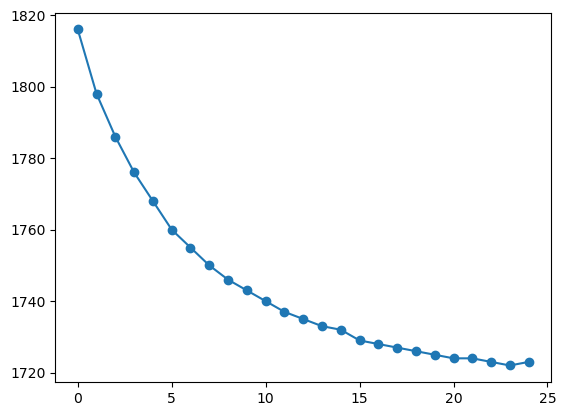

In [9]:
max_indices2 = set()
for i in range(4000, dataset.config.Nt-2500, 1000):
    max_indices2.add(torch.argmax(torch.tensor(u_max[i:i+2_500])).item()+i)
max_indices2 = list(max_indices2)
max_indices2.sort()

plt.figure()
plt.plot(np.diff(max_indices2), marker='o')

print(np.diff(max_indices2))


We take a small look at the first few periods after the transience.

In [10]:
max_indices = set()
for i in range(4000, 12000, 1000):
    max_indices.add(torch.argmax(torch.tensor(u_max[i:i+2_500])).item()+i)
max_indices = list(max_indices)
max_indices.sort()
print(max_indices)
print(np.diff(max_indices))
post_transience = max_indices[0]
period = max_indices[-1]-max_indices[0]
print(f"Period is {period} times steps")

[4847, 6663, 8461, 10247, 12023]
[1816 1798 1786 1776]
Period is 7176 times steps


Text(0.5, 1.0, '$v_{min}$')

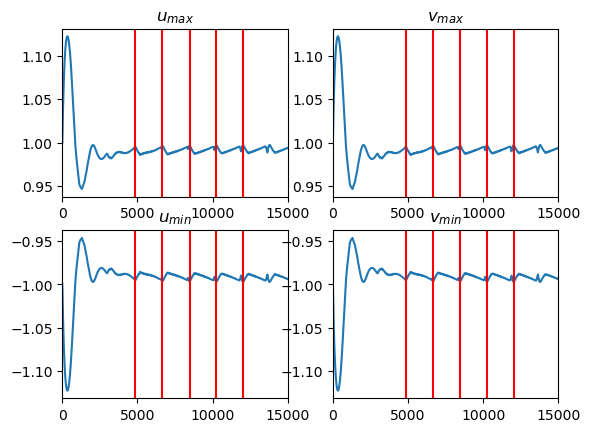

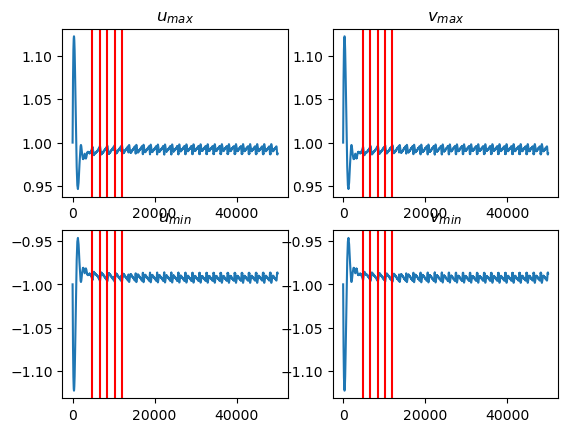

In [11]:
plt.figure()

plt.subplot(2,2,1)
plt.plot(u_max)
for index in max_indices:
    plt.axvline(index, c="red")
plt.title(r"$u_{max}$")
plt.xlim((0,15_000))

plt.subplot(2,2,2)
plt.plot(v_max)
for index in max_indices:
    plt.axvline(index, c="red")
plt.title(r"$v_{max}$")
plt.xlim((0,15_000))

plt.subplot(2,2,3)
plt.plot(u_min)
for index in max_indices:
    plt.axvline(index, c="red")
plt.title(r"$u_{min}$")
plt.xlim((0,15_000))

plt.subplot(2,2,4)
plt.plot(v_min)
for index in max_indices:
    plt.axvline(index, c="red")
plt.title(r"$v_{min}$")
plt.xlim((0,15_000))

plt.figure()

plt.subplot(2,2,1)
plt.plot(u_max)
for index in max_indices:
    plt.axvline(index, c="red")
plt.title(r"$u_{max}$")

plt.subplot(2,2,2)
plt.plot(v_max)
for index in max_indices:
    plt.axvline(index, c="red")
plt.title(r"$v_{max}$")

plt.subplot(2,2,3)
plt.plot(u_min)
for index in max_indices:
    plt.axvline(index, c="red")
plt.title(r"$u_{min}$")

plt.subplot(2,2,4)
plt.plot(v_min)
for index in max_indices:
    plt.axvline(index, c="red")
plt.title(r"$v_{min}$")


(20000.0, 34000.0)

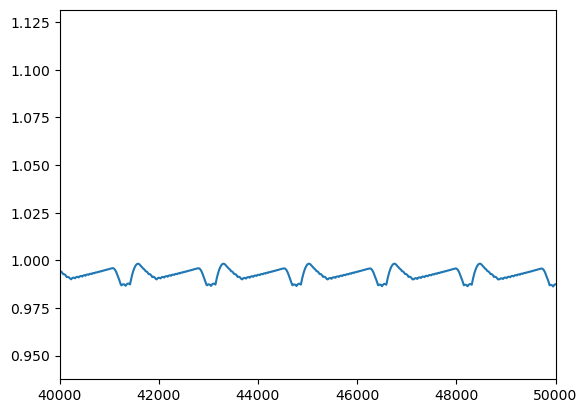

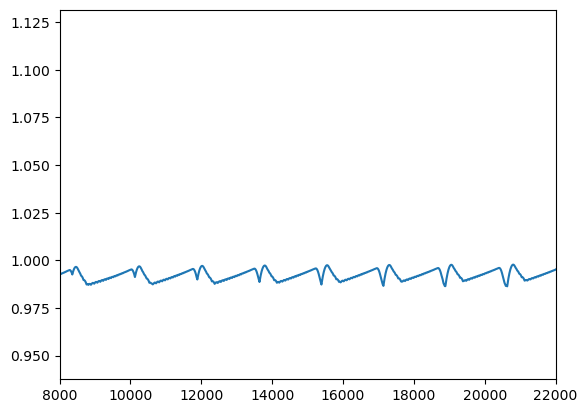

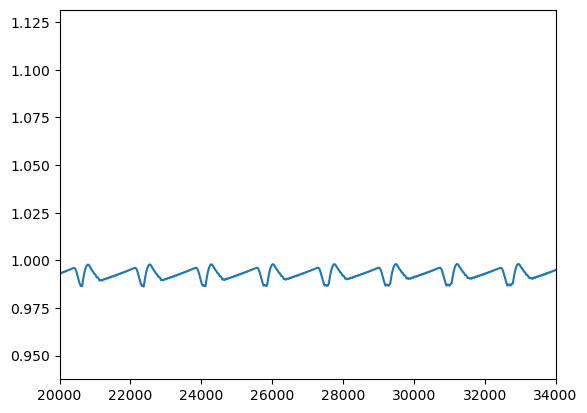

In [12]:
plt.figure()
plt.plot(u_max)
plt.xlim((np.floor(dataset.config.Nt * 0.8), dataset.config.Nt))

plt.figure()
plt.plot(u_max)
plt.xlim((8_000, 22_000))

plt.figure()
plt.plot(u_max)
plt.xlim((20_000, 34_000))

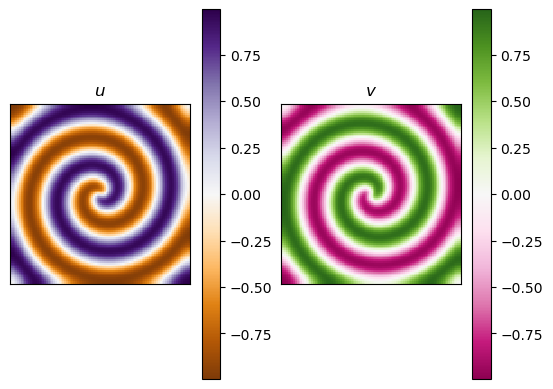

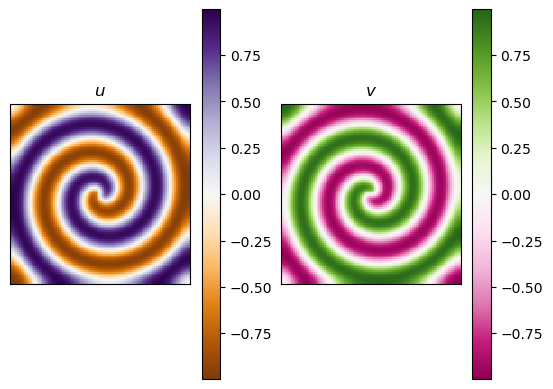

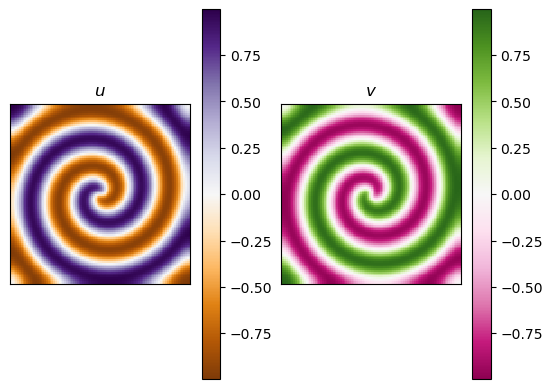

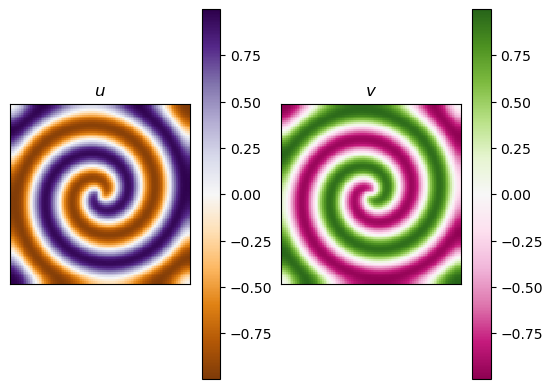

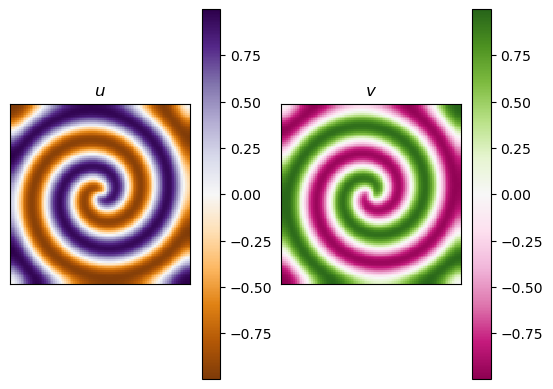

In [13]:
for index in max_indices:
    plt.figure()

    plt.subplot(1, 2, 1)
    plt.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, dataset.data[index][0].detach(), cmap="PuOr")
    plt.axis('square')
    plt.title(f"$u$")
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 2, 2)
    plt.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, dataset.data[index][1].detach(), cmap="PiYG")
    plt.axis('square')
    plt.title(f"$v$")
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])


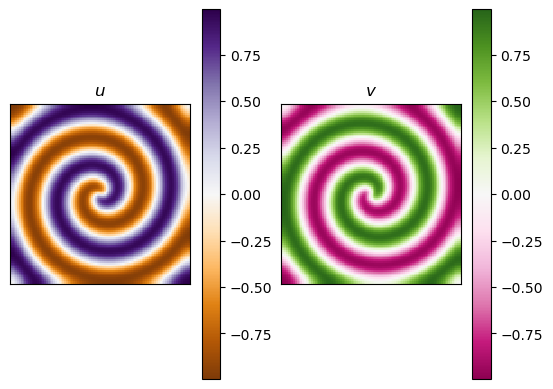

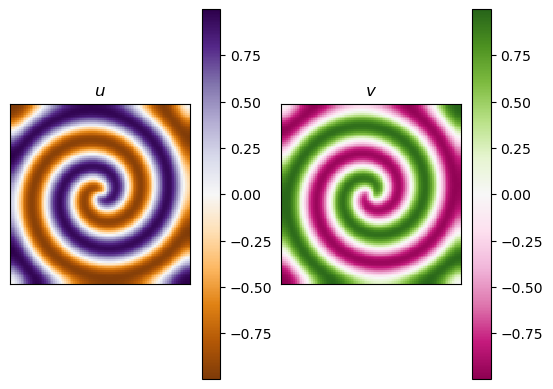

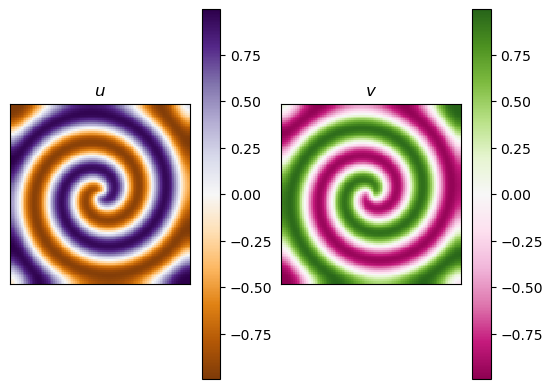

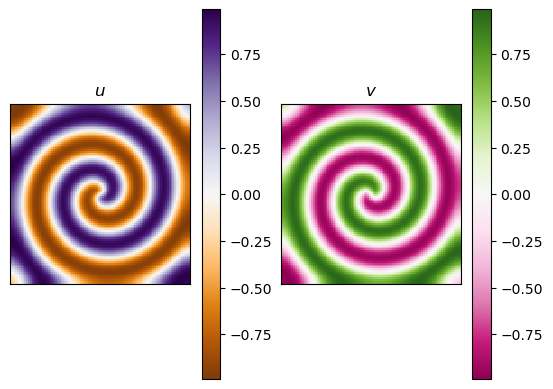

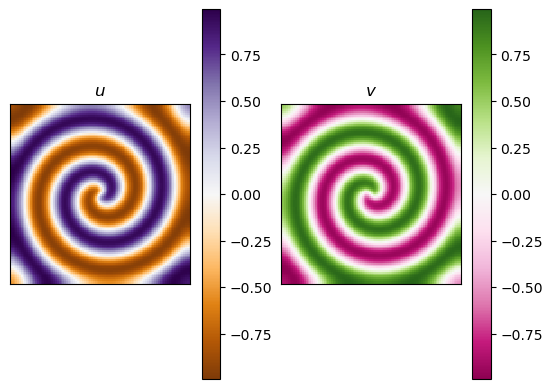

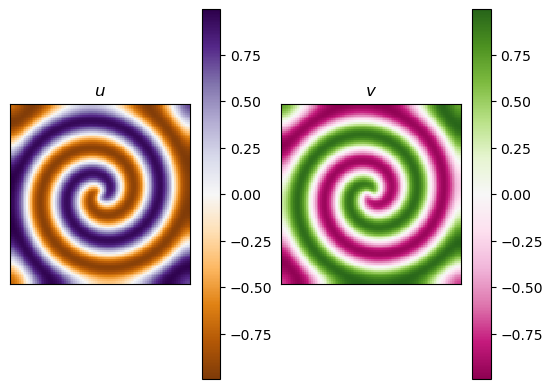

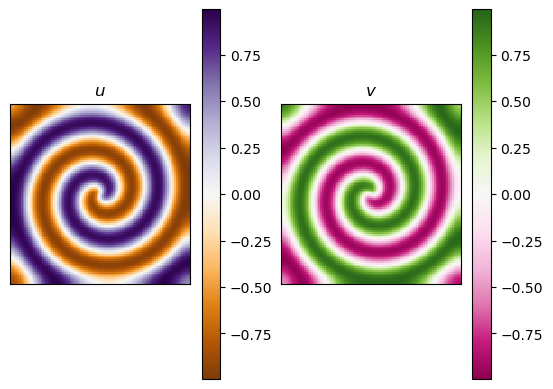

In [14]:
for index in range(post_transience, post_transience+6*period+1, period):
    plt.figure()
    
    plt.subplot(1, 2, 1)
    plt.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, dataset.data[index][0].detach(), cmap="PuOr")
    plt.axis('square')
    plt.title(f"$u$")
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 2, 2)
    plt.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, dataset.data[index][1].detach(), cmap="PiYG")
    plt.axis('square')
    plt.title(f"$v$")
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])


## Symmmetry
The above images shown that we $v$ can be reconstructed from $u$.

([], [])

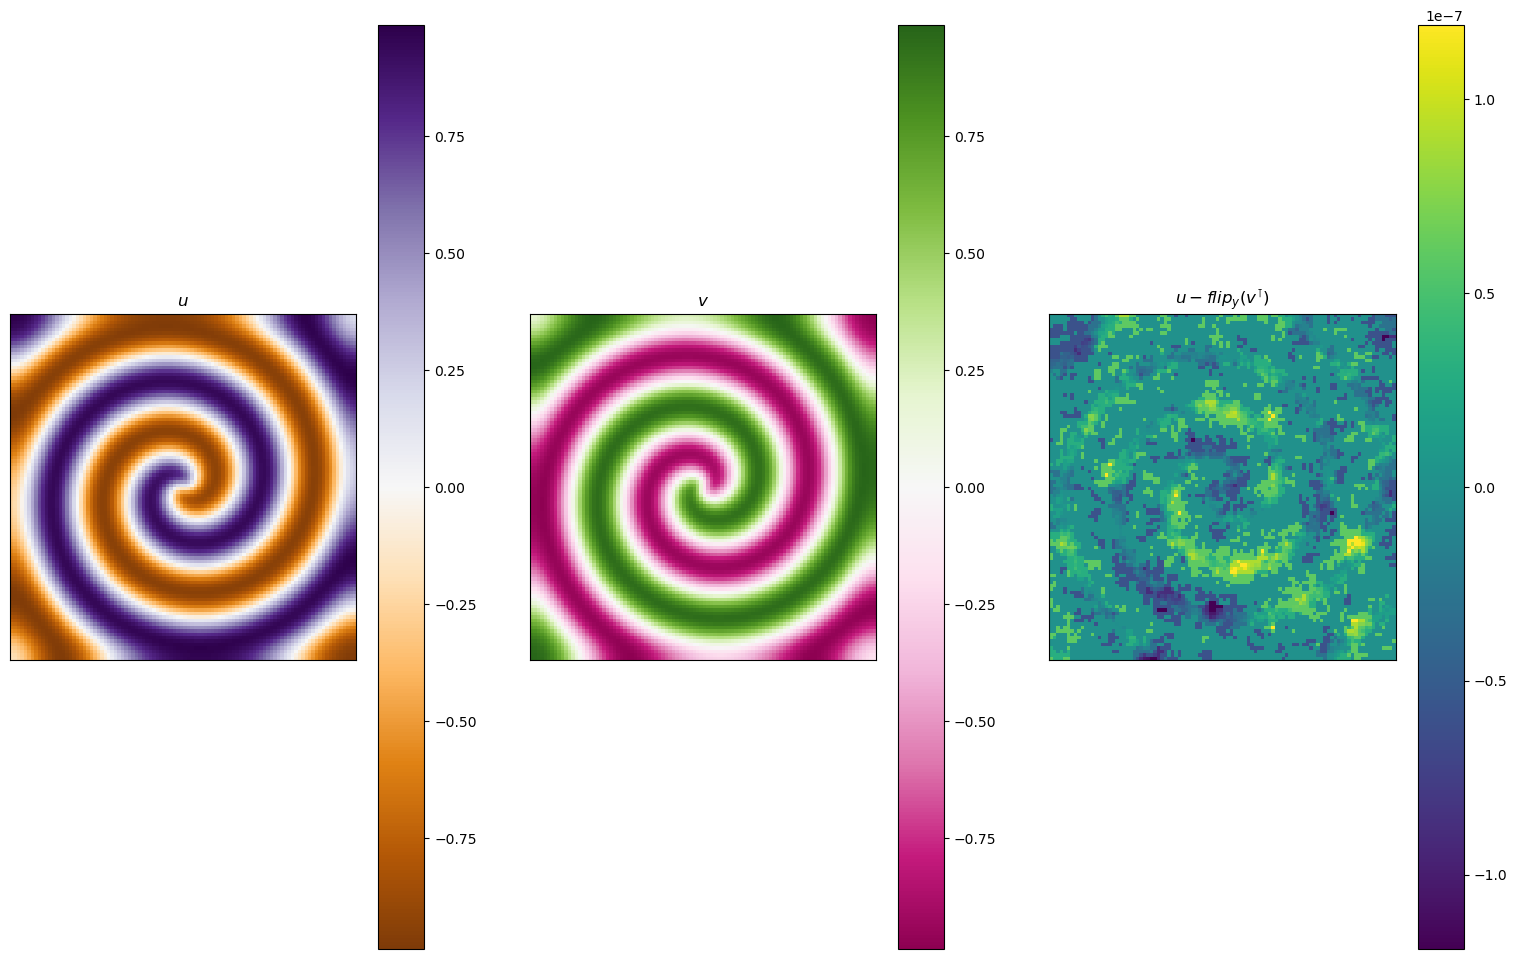

In [32]:
plt.figure(figsize=(19,12))

plt.subplot(1, 3, 1)
plt.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, dataset.data[-1].view(2, 100, 100)[0].detach(), cmap="PuOr")
plt.axis('square')
plt.title(f"$u$")
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, dataset.data[-1].view(2, 100, 100)[1].detach(), cmap="PiYG")
plt.axis('square')
plt.title(f"$v$")
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, dataset.data[-1].view(2, 100, 100)[0].detach()-np.flip(dataset.data[-1].view(2, 100, 100)[1].T.detach().numpy(), axis=1))
plt.axis('square')
plt.title(f"$u-flip_y(v^\intercal)$")
plt.colorbar()
plt.xticks([])
plt.yticks([])


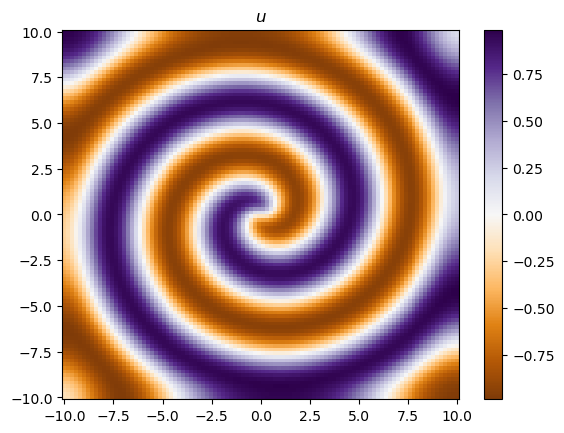

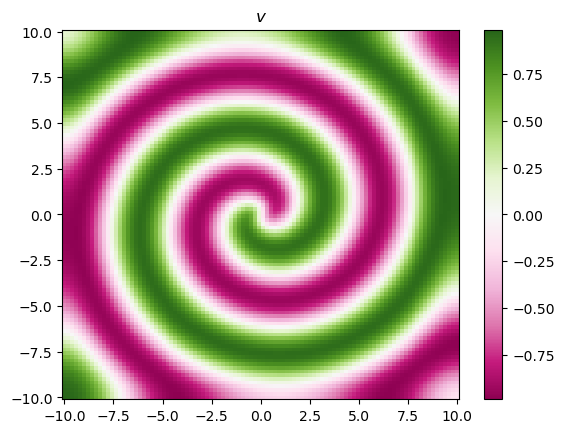

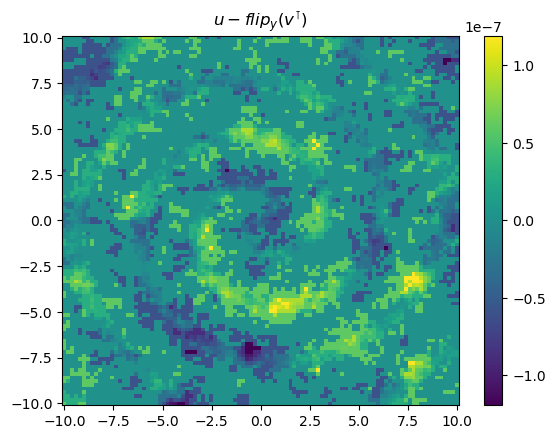

In [16]:
plt.figure()
plt.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, dataset.data[-1].view(2, 100, 100)[0].detach(), cmap="PuOr")
# plt.axis('square')
plt.title(f"$u$")
plt.colorbar()
plt.savefig(results_path / "solution_u.png", bbox_inches="tight")

plt.figure()
plt.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, dataset.data[-1].view(2, 100, 100)[1].detach(), cmap="PiYG")
# plt.axis('square')
plt.title(f"$v$")
plt.colorbar()
plt.savefig(results_path / "solution_v.png", bbox_inches="tight")

plt.figure()
plt.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, dataset.data[-1].view(2, 100, 100)[0].detach()-np.flip(dataset.data[-1].view(2, 100, 100)[1].T.detach().numpy(), axis=1))
# plt.axis('square')
plt.title(f"$u-flip_y(v^\intercal)$")
plt.colorbar()
plt.savefig(results_path / "solution_diff.png", bbox_inches="tight")


## Animating the snapshot

Animations are nice, so we make a gif out of the snapshot matrix.

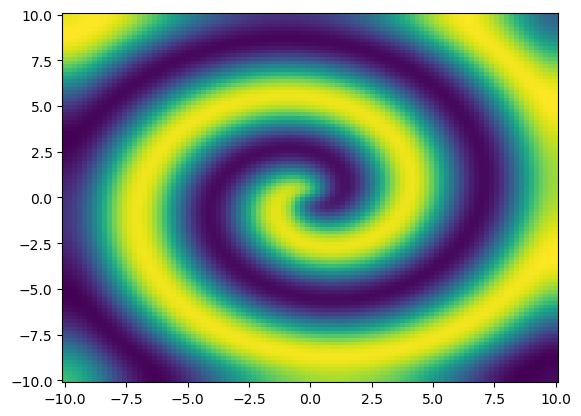

In [17]:
fig, ax = plt.subplots()
quad = ax.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, dataset.data[:, 0, :, :][5000].detach())

num_frames = 500

def animate(k):
    quad.set_array(dataset.data[:, 0, :, :][5000+36*k].detach())
    return quad,

# ani = FuncAnimation(fig, animate, blit=True, frames=num_frames, repeat=False)    
# ani.save(results_path / "reaction_diffusion.gif", dpi=300, writer=PillowWriter(fps=25))

## POD

The default ROM is POD, so let's see how well this does on this dataset. 

In [18]:
subsampled_dataset = torch.utils.data.Subset(
    generate_reaction_diffusion_dataset(base_storage_path=storage_path, return_database=False, u_only=True), 
    torch.arange(start=5000, end=50_000, step=36)
)


In [19]:
train_dataset, test_dataset, validation_dataset = torch.utils.data.random_split(
    subsampled_dataset,
    [750, 250, 250],
    generator=torch.Generator().manual_seed(42)
)

In [20]:
loss_functional = torch.nn.MSELoss(reduction="sum")
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=False,
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
)

total_batch_train_loss = 0.0
total_batch_test_loss = 0.0

for (batch,) in tqdm(train_loader):
    loss = loss_functional(batch, torch.zeros_like(batch))
    total_batch_train_loss += loss.item()

for (batch,) in tqdm(train_loader):
    loss = loss_functional(batch, torch.zeros_like(batch))
    total_batch_test_loss += loss.item()


100%|██████████| 24/24 [00:00<00:00, 1280.48it/s]


In [21]:
# Concatenate the tensors into one tensor
full_train_dataset = torch.vstack([
    train_dataset[i][0] for i in range(len(train_dataset))
])

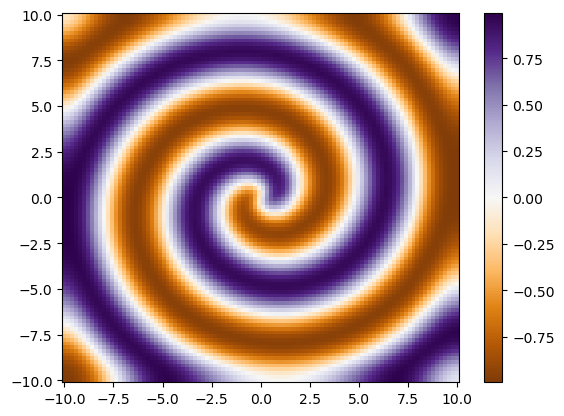

In [23]:
plt.figure()
plt.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, train_dataset[0][0].view(100, 100).detach(), cmap="PuOr")
plt.colorbar()
plt.savefig(results_path / "solution.png", bbox_inches="tight")


In [24]:
U, S, Vh=torch.linalg.svd(full_train_dataset, full_matrices=False)
Sigma = S ** 2
relative_error = ( torch.sum(Sigma, dim=0) - torch.cumsum(Sigma, dim=0) ) / torch.sum(Sigma, dim=0)

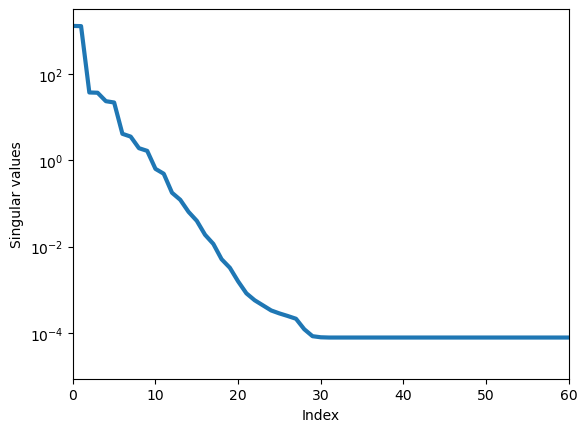

In [25]:
plt.figure()
plt.semilogy(S, lw=3)
plt.xlim((0,60))
plt.ylabel("Singular values")
plt.xlabel("Index")
plt.savefig("../results/reaction_diffusion/singular_values.png", bbox_inches="tight")


(0.0, 60.0)

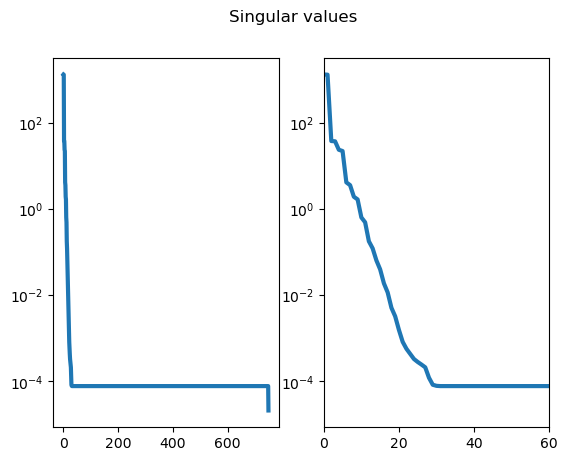

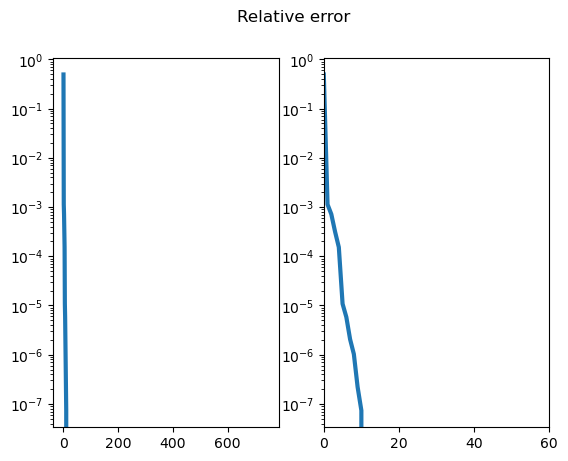

In [26]:
plt.figure()
plt.suptitle("Singular values")

plt.subplot(1, 2, 1)
plt.semilogy(S, lw=3)

plt.subplot(1, 2, 2)
plt.semilogy(S, lw=3)
plt.xlim((0,60))

# ------

plt.figure()
plt.suptitle("Relative error")

plt.subplot(1, 2, 1)
plt.semilogy(relative_error, lw=3)

plt.subplot(1, 2, 2)
plt.semilogy(relative_error, lw=3)
plt.xlim((0,60))


In [33]:
ldim = torch.count_nonzero(relative_error >= 1e-6).item() + 1
print("finfo: ", torch.count_nonzero(relative_error >= torch.finfo().eps).item() + 1)
print("ldim: ", ldim)

Vhr = Vh[:ldim,:]

finfo:  11
ldim:  10


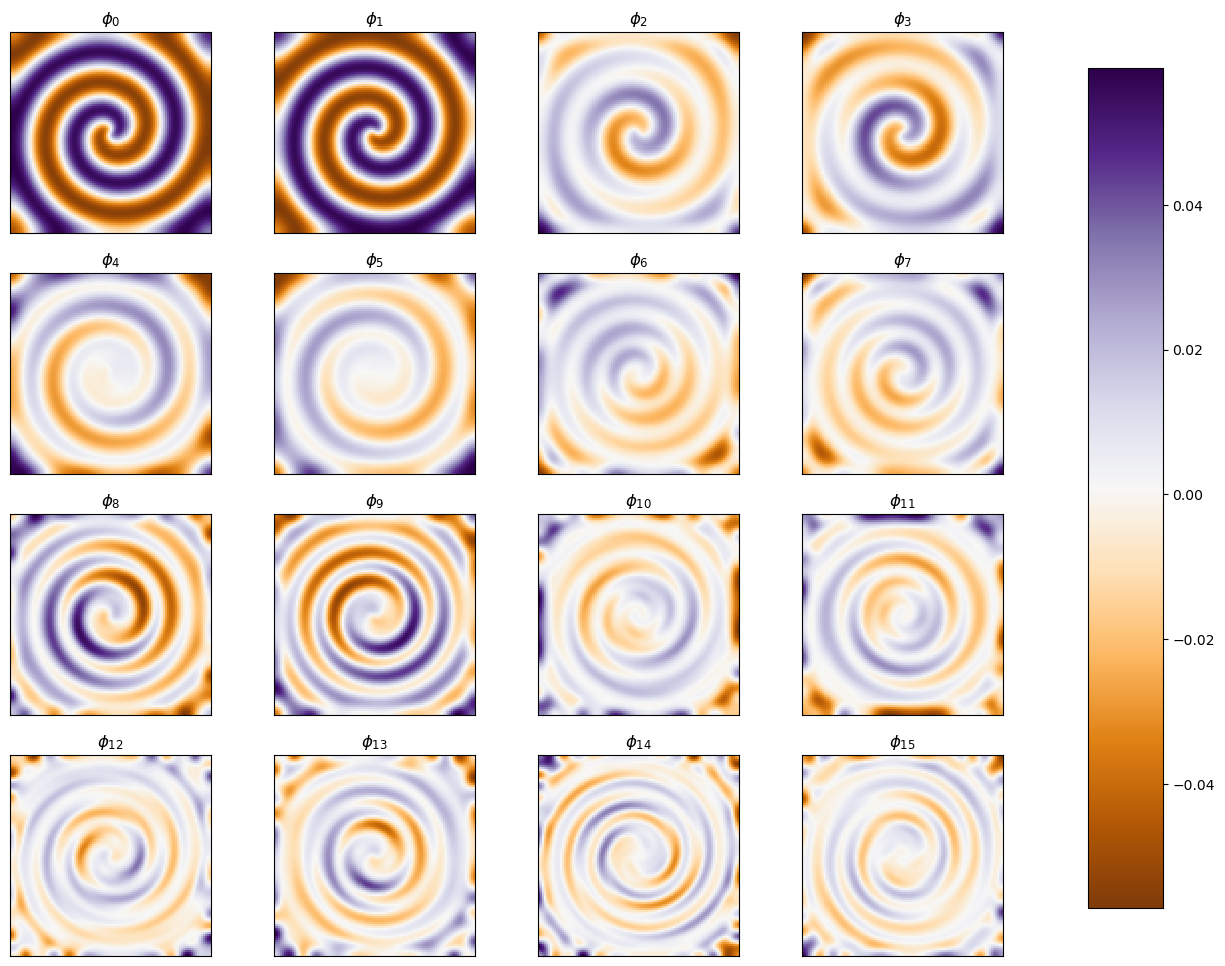

In [28]:
fig, axes = plt.subplots(4, 4, figsize=(15, 12))

# Plot each image in a subplot
for i, ax in enumerate(axes.flatten()):
    pcm = ax.pcolormesh(dataset.meshgrid_x, dataset.meshgrid_y, Vh[i, :].reshape(100, 100), cmap="PuOr")
    ax.set_title(f"$\phi_{{{i}}}$")
    ax.axis('square')
    ax.set_xticks([])  # Hide x-axis ticks
    ax.set_yticks([])  # Hide y-axis ticks

# # Add a big colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(pcm, cax=cbar_ax)


In [29]:
train_loss_pod = 0.0

for (batch,) in tqdm(train_loader):
    loss = loss_functional(batch, torch.einsum("nm,bn->bm", Vhr.T @ Vhr, batch))
    train_loss_pod += loss.item()

print("Loss (abs): ", train_loss_pod)
print("Loss (rel): ", train_loss_pod / total_batch_train_loss)

100%|██████████| 24/24 [00:02<00:00, 10.09it/s]

Loss (abs):  0.6950194938108325
Loss (rel):  2.0453057040526934e-07


In [30]:
test_loss_pod = 0.0

for (batch,) in tqdm(test_loader):
    loss = loss_functional(batch, torch.einsum("nm,bn->bm", Vhr.T @ Vhr, batch))
    test_loss_pod += loss.item()

print("Loss (abs): ", test_loss_pod)
print("Loss (rel): ", test_loss_pod / total_batch_test_loss)

100%|██████████| 8/8 [00:00<00:00, 10.05it/s]

Loss (abs):  0.22479576244950294
Loss (rel):  6.615297258266291e-08
